In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.gridspec as gridspec
import os

In [6]:
import tensorflow as tf
import tensorflow.contrib.layers as tcl
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

class DC_WGAN(object):
    def __init__(self, mb_size, X_dim, z_dim, h_dim, penalty=10, n_disc=5, train_epoch=20):
        self.mb_size = mb_size
        self.X_dim = X_dim
        self.z_dim = z_dim
        self.h_dim = h_dim
        self.penalty = penalty
        self.n_disc = 5 ## number of disciminator steps per generator step
        self.train_epoch = 20
        
    def lrelu(self, x, th=0.2):
        return tf.maximum(th * x, x)    
    
#     def sample_z(self, m):
#         return np.random.normal(-1, 1, (m, 100))
#         return np.random.normal(0, 1, (m, 1, 1, 100))
    
    def plot(self, samples):
        fig = plt.figure(figsize=(4, 4))
        gs = gridspec.GridSpec(4, 4)
        gs.update(wspace=0.05, hspace=0.05)

        for i, sample in enumerate(samples):
            ax = plt.subplot(gs[i])
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')
            plt.imshow(sample.reshape(64, 64), cmap='Greys_r')

        return fig

    def generator(self, x, isTrain=True, reuse=False):
        with tf.variable_scope('generator', reuse=reuse):
            
            
            x = tcl.fully_connected(x, 4*4*256, activation_fn=tf.identity, scope='g_z')
            x = tf.reshape(x, [tf.shape(x)[0], 4, 4, 256])
            x = tcl.batch_norm(x)
            x = tf.nn.relu(x)
            
            # 1st hidden layer
            conv1 = tcl.conv2d_transpose(x, 128, [4, 4], stride=(2, 2),  weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
            lrelu1 = self.lrelu(tcl.batch_norm(conv1, is_training=isTrain))

            # 2nd hidden layer
            conv2 = tcl.conv2d_transpose(lrelu1, 64, [4, 4], stride=(2, 2),  weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
            lrelu2 = self.lrelu(tcl.batch_norm(conv2, is_training=isTrain))
            
            # output layer
            conv3 = tcl.conv2d_transpose(lrelu2, 1, [4, 4], stride=(4, 4),  weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')

            return conv3
        
#             # 1st hidden layer
#             conv1 = tcl.conv2d_transpose(x, 1024, [4, 4], stride=(1, 1),  weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='valid')
#             lrelu1 = self.lrelu(tf.layers.batch_normalization(conv1, training=isTrain))

#             # 2nd hidden layer
#             conv2 = tcl.conv2d_transpose(lrelu1, 512, [4, 4], stride=(2, 2),  weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
#             lrelu2 = self.lrelu(tf.layers.batch_normalization(conv2, training=isTrain))

#             # 3rd hidden layer
#             conv3 = tcl.conv2d_transpose(lrelu2, 256, [4, 4], stride=(2, 2),  weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
#             lrelu3 = self.lrelu(tf.layers.batch_normalization(conv3, training=isTrain))

#             # 4th hidden layer
#             conv4 = tcl.conv2d_transpose(lrelu3, 128, [4, 4], stride=(2, 2),  weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
#             lrelu4 = self.lrelu(tf.layers.batch_normalization(conv4, training=isTrain))

#             # output layer
#             conv5 = tcl.conv2d_transpose(lrelu4, 1, [4, 4], stride=(2, 2),  weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
#             o = tf.nn.tanh(conv5)

#             return o

    def discriminator(self, x, isTrain=True, reuse=False):
        with tf.variable_scope('discriminator', reuse=reuse):
            # 1st hidden layer
            conv1 = tcl.conv2d(x, 64, [4, 4], stride=(2, 2), weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
            lrelu1 = self.lrelu(conv1)
            
            conv2 = tcl.conv2d(lrelu1, 128, [4, 4], stride=(2, 2), weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
            lrelu2 = self.lrelu(conv2)
            
            conv3 = tcl.conv2d(lrelu2, 1, [4, 4], stride=(1, 1),weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='valid')


#             # 2nd hidden layer
#             conv2 = tcl.conv2d(lrelu1, 256, [4, 4], stride=(2, 2), weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
#             lrelu2 = self.lrelu(tf.layers.batch_normalization(conv2, training=isTrain))

#             # 3rd hidden layer
#             conv3 = tcl.conv2d(lrelu2, 512, [4, 4], stride=(2, 2), weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
#             lrelu3 = self.lrelu(tf.layers.batch_normalization(conv3, training=isTrain))

#             # 4th hidden layer
#             conv4 = tcl.conv2d(lrelu3, 1024, [4, 4], stride=(2, 2), weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='same')
#             lrelu4 = self.lrelu(tf.layers.batch_normalization(conv4, training=isTrain))

#             # output layer
#             conv5 = tcl.conv2d(lrelu4, 1, [4, 4], stride=(1, 1),weights_initializer=tf.random_normal_initializer(stddev=0.02), padding='valid')
#             o = tf.nn.sigmoid(conv5)

            return conv3
        
        
    def training(self):
        tf.reset_default_graph()
        
#         # MNIST resize and normalization
#         mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=[])
#         train_set = (train_set - 0.5) / 0.5  # normalization; range: -1 ~ 1

        with tf.name_scope('inputs'):
            X = tf.placeholder(tf.float32, shape=(None, 64, 64, 1)) ## dataset
#             z = tf.placeholder(tf.float32, shape=(None, 1, 1, 100)) ## noise passed to generator
            z = tf.placeholder(tf.float32, shape=(None, 100)) ## noise passed to generator

        G_sample = self.generator(z)
        print(G_sample.shape)
        D_real = self.discriminator(X)
        D_fake = self.discriminator(G_sample, reuse=True)

        D_loss = tf.reduce_mean(D_real) - tf.reduce_mean(D_fake)
        G_loss = tf.reduce_mean(D_fake)
        
        
#         alpha = tf.random_uniform(shape=[self.mb_size,64, 64, 1], minval=0.,maxval=1.)
        alpha = tf.random_uniform([], minval=0.,maxval=1.)
        x_hat = X*alpha + (1-alpha)*G_sample
        gradients = tf.gradients(self.discriminator(x_hat, reuse=True), [x_hat])[0]
        slopes = tf.sqrt(tf.reduce_sum(tf.square(gradients), axis=1) + 1e-16)
        gradient_penalty = self.penalty*tf.reduce_mean(tf.square(slopes - 1.0))
        D_loss += gradient_penalty


        T_vars = tf.trainable_variables()
        D_vars = [var for var in T_vars if var.name.startswith('discriminator')]
        G_vars = [var for var in T_vars if var.name.startswith('generator')]

        G_solver = tf.train.AdamOptimizer(learning_rate=1e-4, beta1=0,
                                          beta2=0.9).minimize(G_loss, var_list=G_vars)


        D_solver = tf.train.AdamOptimizer(learning_rate=1e-4, beta1=0, 
                                          beta2=0.9).minimize(D_loss, var_list=D_vars)

        sess = tf.InteractiveSession()
        sess.run(tf.global_variables_initializer())
        
        # MNIST resize and normalization
        mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=[])
        train_set = tf.image.resize_images(mnist.train.images, [64, 64]).eval(session=sess)
        train_set = (train_set - 0.5) / 0.5  # normalization; range: -1 ~ 1

        if not os.path.exists('out_improvedGAN_dgscan/'):
            os.makedirs('out_improvedGAN_dgscan/')
        
        n_critic = 5
        i = 0
        for epoch in range(self.train_epoch):
            print('Epoch: {}'.format(epoch))
            
            for it in range(mnist.train.num_examples // self.mb_size):
                
#                 X_mb = train_set[it*mb_size:(it+1)*mb_size]
#                 z_mb = self.sample_z(mb_size)
                
                for k in range(n_critic):
                    
                    batch_images = train_set[it*mb_size:(it+1)*mb_size]
                    batch_z = np.random.normal(-1.0, 1.0, size=[self.mb_size, 100]).astype(np.float32)
                    
                    _, D_loss_curr = sess.run([D_solver, D_loss],
                        feed_dict={X: batch_images, z: batch_z})
                    
                batch_images = random.sample(train_set, self.mb_size)
                batch_z = np.random.normal(-1.0, 1.0, size=[self.mb_size, 100]).astype(np.float32)    
                
                _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={z: batch_z})

                if it % 10 == 0:
                    print('Iter: {}; D loss: {:.4}; G_loss: {:.4}'.format(i, D_loss_curr, G_loss_curr))
                    batch_z  = np.random.normal(-1.0, 1.0, size=[8, 100]).astype(np.float32)
                    samples = sess.run(G_sample, feed_dict={z: batch_z})
                    fig = self.plot(samples)
                    plt.savefig('out_improved_DCGAN/{}.png'
                                .format(str(i).zfill(3)), bbox_inches='tight')
                    i += 1
                    plt.close(fig) 

In [7]:
mb_size = 64
X_dim = 4096
z_dim = 50
h_dim = 64
n_disc = 5
train_epoch = 20
penalty = 10
mnist_train = DC_WGAN(mb_size, X_dim, z_dim, h_dim, penalty, train_epoch)

In [8]:
mnist_train.training()

(?, 64, 64, 1)
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0


TypeError: Population must be a sequence or set.  For dicts, use list(d).

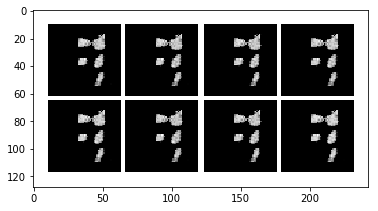

In [144]:
img=mpimg.imread('out_improved_DCGAN/060.png')
plt.imshow(img)